In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Data

In [2]:
# Load California Housing dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

# Display first few rows and basic information
print("Dataset Overview:")
print(df.head())

Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


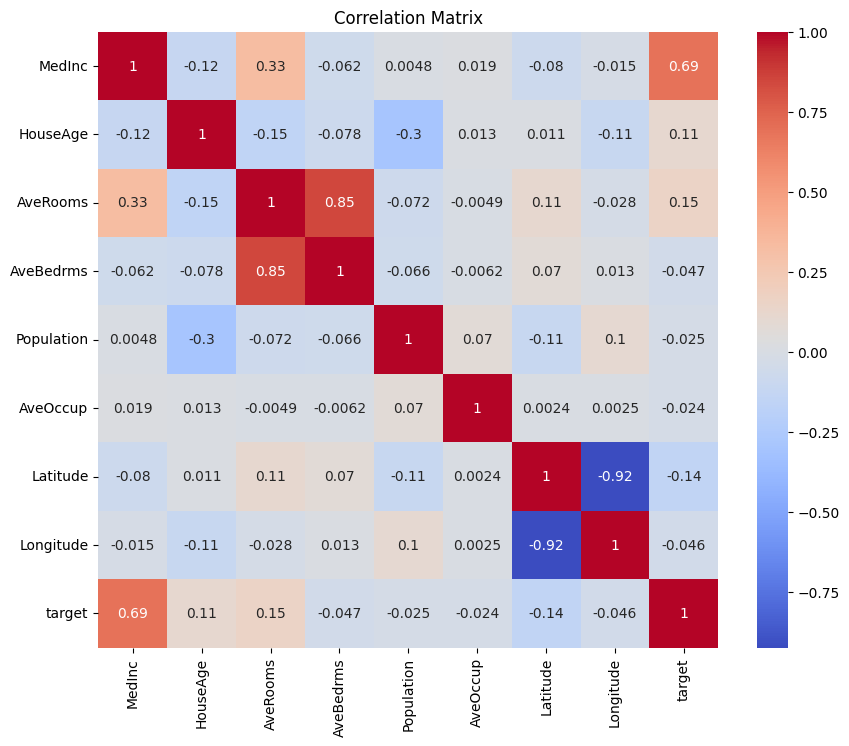

In [3]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [4]:
X = df.drop('target', axis=1)
y = df['target']
feature_names = housing.feature_names
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear regression

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))


Model Performance Metrics:
Mean Squared Error: 0.5559

Feature Importance:
      Feature  Coefficient
3   AveBedrms     0.783145
0      MedInc     0.448675
7   Longitude    -0.433708
6    Latitude    -0.419792
2    AveRooms    -0.123323
1    HouseAge     0.009724
5    AveOccup    -0.003526
4  Population    -0.000002


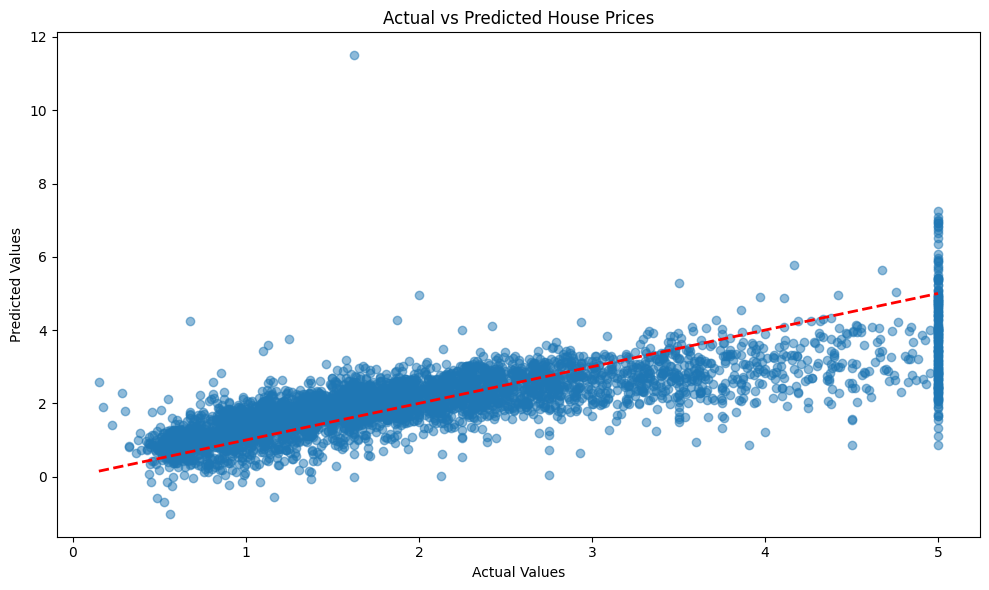

In [6]:
# Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

In [7]:
def predict_house_price(features_dict):
    # Convert input dictionary to DataFrame
    input_df = pd.DataFrame([features_dict])
    
    # Ensure correct column order
    input_df = input_df[X.columns]
    
    # Make prediction
    prediction = model.predict(input_df)
    return prediction[0]

# Example usage
sample_house = {
    'MedInc': 8.3252,
    'HouseAge': 41.0,
    'AveRooms': 6.984127,
    'AveBedrms': 1.023810,
    'Population': 322.0,
    'AveOccup': 2.555556,
    'Latitude': 37.88,
    'Longitude': -122.23
}

predicted_price = predict_house_price(sample_house)
print(f"\nPredicted House Price: ${predicted_price*100000:.2f}")


Predicted House Price: $415194.31


## Lasso regression

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("data2.csv")

# Prepare features and target
X = df.drop(['Species', 'Weight'], axis=1)  # Weight will be our target
y = df['Weight']
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

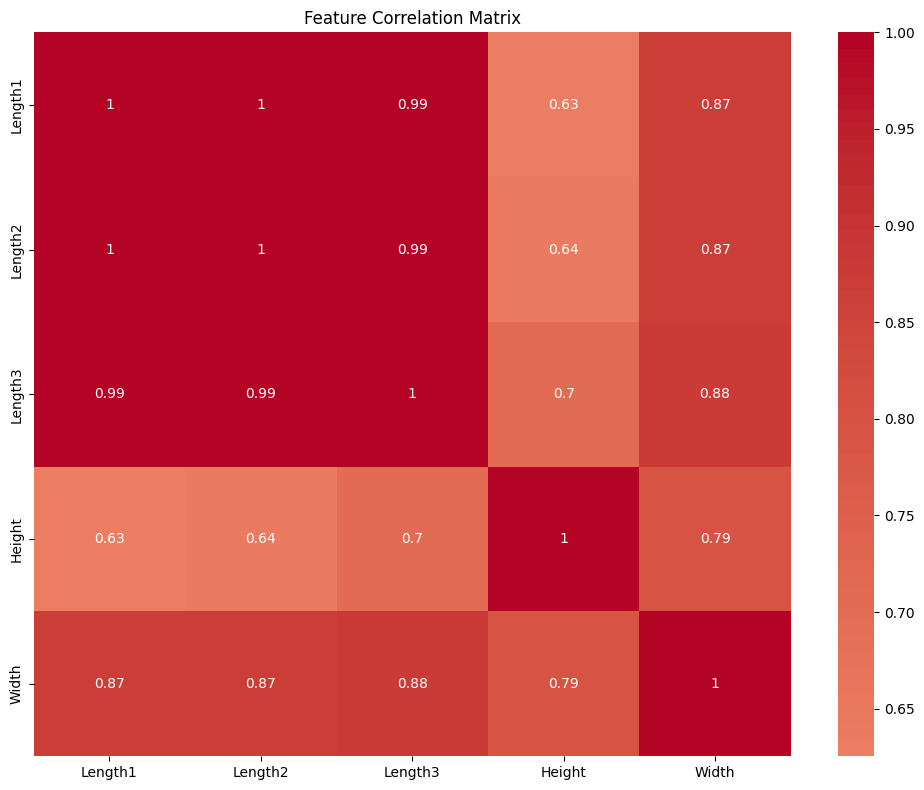


Highly Correlated Feature Pairs (>0.8):
Length1 - Length2: 1.000
Length1 - Length3: 0.992
Length1 - Width: 0.867
Length2 - Length3: 0.994
Length2 - Width: 0.874
Length3 - Width: 0.879


In [11]:
# Create correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Print high correlations
print("\nHighly Correlated Feature Pairs (>0.8):")
corr_matrix = X.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [(col1, col2, corr_matrix.loc[col1, col2]) 
             for col1 in corr_matrix.columns 
             for col2 in corr_matrix.columns 
             if corr_matrix.loc[col1, col2] > 0.8 and col1 < col2]

for col1, col2, corr in high_corr:
    print(f"{col1} - {col2}: {corr:.3f}")

In [12]:
# Find optimal alpha using cross-validation
lasso_cv = LassoCV(
    cv=5,
    random_state=42,
    max_iter=5000,
    alphas=np.logspace(-4, 1, 100)
)
lasso_cv.fit(X_train_scaled, y_train)

# Train Lasso with optimal alpha
lasso_optimal = Lasso(alpha=lasso_cv.alpha_, random_state=42)
lasso_optimal.fit(X_train_scaled, y_train)

# Train regular linear regression for comparison
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

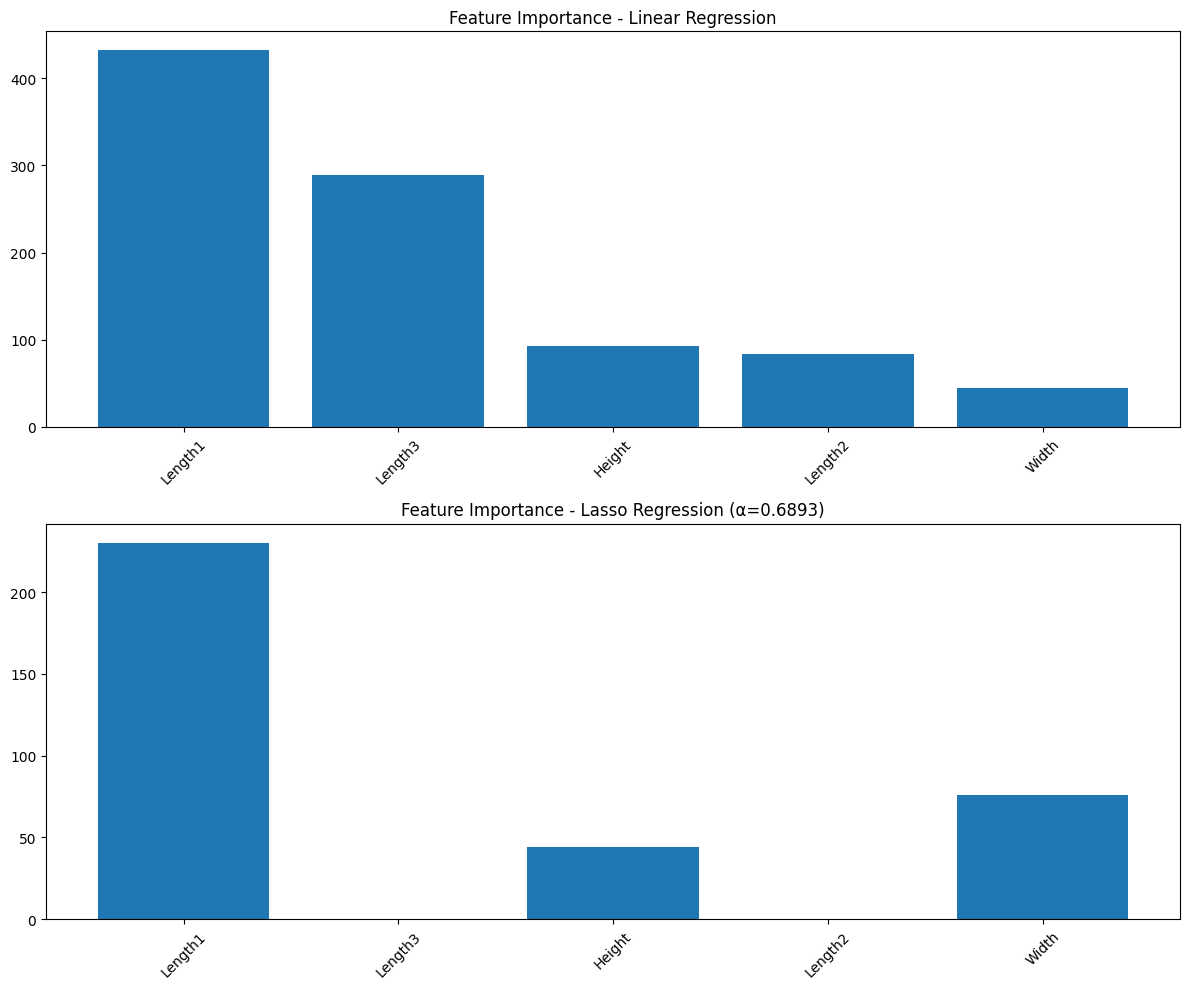


Feature Importance Comparison:
   Feature  Linear_Regression  Lasso_Regression
0  Length1         432.274726        230.189561
2  Length3         288.567976          0.000000
3   Height          92.523216         44.233649
1  Length2          83.013041          0.000000
4    Width          44.067409         75.727602


In [13]:
# Create feature importance comparison
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Linear_Regression': abs(linear_reg.coef_),
    'Lasso_Regression': abs(lasso_optimal.coef_)
})

# Sort by Linear Regression importance
feature_importance = feature_importance.sort_values('Linear_Regression', ascending=False)

# Plot comparison
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Linear Regression coefficients
ax1.bar(feature_importance['Feature'], feature_importance['Linear_Regression'])
ax1.set_title('Feature Importance - Linear Regression')
ax1.tick_params(axis='x', rotation=45)

# Lasso coefficients
ax2.bar(feature_importance['Feature'], feature_importance['Lasso_Regression'])
ax2.set_title(f'Feature Importance - Lasso Regression (α={lasso_cv.alpha_:.4f})')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print feature importance comparison
print("\nFeature Importance Comparison:")
print(feature_importance)